In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Cross-Validation and Bias-Variance decomposition
## Cross-Validation
Implementing 4-fold cross-validation below:

In [2]:
from helpers import load_data
from ex3 import *

# load dataset
x, y = load_data()

In [3]:
def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold."""
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval]
                 for k in range(k_fold)]
    return np.array(k_indices)

In [4]:
build_k_indices(y, 4, 1)

array([[27, 35, 40, 38,  2,  3, 48, 29, 46, 31, 32, 39],
       [21, 36, 19, 42, 49, 26, 22, 13, 41, 17, 45, 24],
       [23,  4, 33, 14, 30, 10, 28, 44, 34, 18, 20, 25],
       [ 6,  7, 47,  1, 16,  0, 15,  5, 11,  9,  8, 12]])

In [5]:
from costs import compute_mse
def compute_rmse(y, x, w):
    l = compute_mse(y, x, w)
    return np.math.sqrt(2*l)

In [6]:
from ridge_regression import ridge_regression
from build_polynomial import build_poly
import matplotlib.pyplot as plt

def cross_validation(y, x, k_indices, k, lambda_, degree, mean=True):
    """return the loss of ridge regression."""
    losses_tr = []
    losses_te = []
    for k_group in range(k):
        index_te = k_indices[k_group]
        index_tr = np.setdiff1d(np.arange(len(y)), index_te)
        x_te = x[index_te]
        x_tr = x[index_tr]
        y_te = y[index_te]
        y_tr = y[index_tr]
    # ***************************************************
    # INSERT YOUR CODE HERE
    # get k'th subgroup in test, others in train: TODO
    # ***************************************************
        x_te_poly = build_poly(x_te, degree)
        x_tr_poly = build_poly(x_tr, degree)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form data with polynomial degree: TODO
    # ***************************************************
        w = ridge_regression(y_tr, x_tr_poly, lambda_)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ridge regression: TODO
    # ***************************************************
        rmse_tr = compute_rmse(y_tr, x_tr_poly, w)
        rmse_te = compute_rmse(y_te, x_te_poly, w)
        losses_tr.append(rmse_tr)
        losses_te.append(rmse_te)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate the loss for train and test data: TODO
    # ***************************************************
    if mean==True:
        loss_tr = np.mean(losses_tr)
        loss_te = np.mean(losses_te)
    else:
        loss_tr = losses_tr
        loss_te = losses_te
    return loss_tr, loss_te

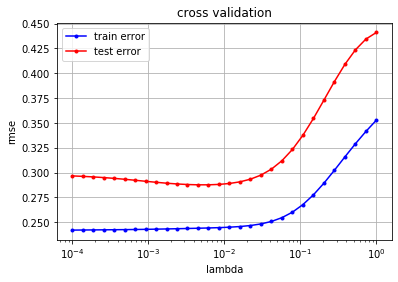

In [7]:
from plots import cross_validation_visualization

def cross_validation_demo():
    seed = 1
    degree = 7
    k_fold = 4
    lambdas = np.logspace(-4, 0, 30)
    #lambdas =[0.1, 0.01, 1]
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []
    for lambda_ in lambdas:
        loss_tr, loss_te = cross_validation(y, x, k_indices, k_fold, lambda_, degree)
        rmse_tr.append(loss_tr)
        rmse_te.append(loss_te)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # cross validation: TODO
    # ***************************************************    
    cross_validation_visualization(lambdas, rmse_tr, rmse_te)

cross_validation_demo()

In [8]:
def select_best_degree(y, x, max_degree, k_fold):
    seed = 1
    lambdas = np.logspace(-4, 0, 30)
    k_indices = build_k_indices(y, k_fold, seed)
    loss_min = np.inf
    degree_star = 0
    lambda_star = 0
    for degree in range(1, max_degree+1):
        rmse_te = []
        for lambda_ in lambdas:
            loss_tr, loss_te = cross_validation(y, x, k_indices, k_fold, lambda_, degree)
            if loss_te < loss_min:
                loss_min = loss_te
                degree_star = degree
                lambda_star = lambda_
    return degree_star, lambda_star

In [9]:
def select_best_variance(y, x, max_degree, k_fold):
    seed = 1
    lambdas = np.logspace(-4, 0, 30)
    k_indices = build_k_indices(y, k_fold, seed)
    var_min = np.inf
    degree_star = 0
    lambda_star = 0
    for degree in range(1, max_degree+1):
        rmse_te = []
        for lambda_ in lambdas:
            losses_tr, losses_te = cross_validation(y, x, k_indices, k_fold, lambda_, degree, False)
            var = np.var(losses_te)
            if var < var_min:
                var_min = var
                degree_star = degree
                lambda_star = lambda_
    return degree_star, lambda_star

In [10]:
max_degree = 13
k_fold = 4
degree_star, lambda_star = select_best_degree(y, x, max_degree, k_fold)
print("Best degree: {} with lambda = {}".format(degree_star, lambda_star))

Best degree: 7 with lambda = 0.004520353656360241


In [11]:
max_degree = 13
k_fold = 4
degree_star, lambda_star = select_best_variance(y, x, max_degree, k_fold)
print("Best variance degree: {} with lambda = {}".format(degree_star, lambda_star)) #different lambda as before

Best variance degree: 7 with lambda = 0.041753189365604


Test variance: 2.3637910643050415e-05


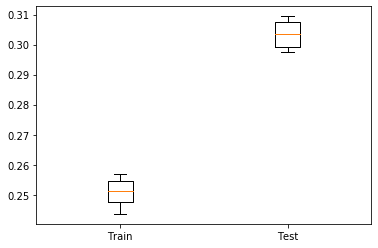

In [12]:
#using the best degree and lambda computed before
degree = degree_star
k_fold = 4
lambda_ = lambda_star
k_indices = build_k_indices(y, k_fold, 1)
losses_tr, losses_te = cross_validation(y, x, k_indices, k_fold, lambda_, degree, False)
var_te = np.var(losses_te)
var_tr = np.var(losses_tr)
plt.boxplot([losses_tr, losses_te], labels=["Train", "Test"])
print("Test variance: {}".format(var_te))
plt.show()

## Bias-Variance Decomposition
Visualize bias-variance trade-off by implementing the function `bias_variance_demo()` below:

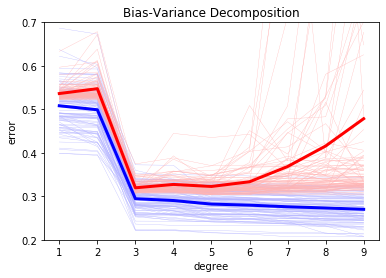

In [28]:
from least_squares import least_squares
from split_data import split_data
from plots import bias_variance_decomposition_visualization

def bias_variance_demo():
    """The entry."""
    # define parameters
    seeds = range(100)
    num_data = 10000
    ratio_train = 0.005
    degrees = range(1, 10)
    
    # define list to store the variable
    rmse_tr = np.empty((len(seeds), len(degrees)))
    rmse_te = np.empty((len(seeds), len(degrees)))
    for index_seed, seed in enumerate(seeds):
        np.random.seed(seed)
        x = np.linspace(0.1, 2 * np.pi, num_data)
        y = np.sin(x) + 0.3 * np.random.randn(num_data).T
        x_tr, x_te, y_tr, y_te = split_data(x, y, ratio_train, seed)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # split data with a specific seed: TODO
        # ***************************************************
        for degree in degrees:
            x_te_poly = build_poly(x_te, degree)
            x_tr_poly = build_poly(x_tr, degree)
            w = least_squares(y_tr, x_tr_poly)
            rmse_tr1 = compute_rmse(y_tr, x_tr_poly, w)
            rmse_te1 = compute_rmse(y_te, x_te_poly, w)
            rmse_tr[index_seed, degree-1] = rmse_tr1
            rmse_te[index_seed, degree-1] = rmse_te1
        # ***************************************************
        # INSERT YOUR CODE HERE
        # bias_variance_decomposition: TODO
        # ***************************************************

    bias_variance_decomposition_visualization(degrees, rmse_tr, rmse_te)
    return rmse_te, rmse_tr

_,_=bias_variance_demo()

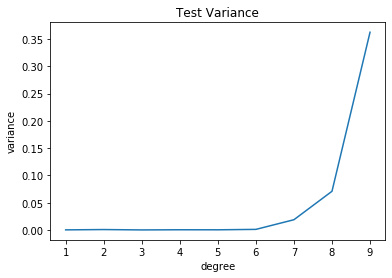

In [47]:
degrees = range(1, 10)
rmse_te,_ = bias_variance_demo()
rmse_te_variance = np.expand_dims(np.var(rmse_te, axis=0), axis=0)
plt.close()
plt.figure()
plt.plot(degrees, rmse_te_variance.T)
plt.xlabel("degree")
plt.ylabel("variance")
plt.title("Test Variance");

The variance increase a lot by increasing the polynomial degree. This is because the variance term is more sensible to little differences in the data

Ridge regression will give a constraint to the degree, so we should expect a diminuition in the variance

In [44]:
def select_best_lambda(y, x, degree, k_fold):
    seed = 1
    lambdas = np.logspace(-4, 0, 30)
    k_indices = build_k_indices(y, k_fold, seed)
    loss_min = np.inf
    lambda_star = 0
    for lambda_ in lambdas:
        loss_tr, loss_te = cross_validation(y, x, k_indices, k_fold, lambda_, degree)
        if loss_te < loss_min:
            loss_min = loss_te
            lambda_star = lambda_
    return lambda_star

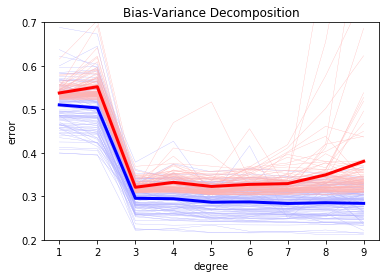

In [45]:
from least_squares import least_squares
from split_data import split_data
from plots import bias_variance_decomposition_visualization

def bias_variance_demo_ridge():
    """The entry."""
    # define parameters
    seeds = range(100)
    num_data = 10000
    ratio_train = 0.005
    degrees = range(1, 10)
    
    # define list to store the variable
    rmse_tr = np.empty((len(seeds), len(degrees)))
    rmse_te = np.empty((len(seeds), len(degrees)))
    for index_seed, seed in enumerate(seeds):
        np.random.seed(seed)
        x = np.linspace(0.1, 2 * np.pi, num_data)
        y = np.sin(x) + 0.3 * np.random.randn(num_data).T
        x_tr, x_te, y_tr, y_te = split_data(x, y, ratio_train, seed)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # split data with a specific seed: TODO
        # ***************************************************
        for degree in degrees:
            x_te_poly = build_poly(x_te, degree)
            x_tr_poly = build_poly(x_tr, degree)
            lambda_ = select_best_lambda(y_tr, x_tr, degree, 4)
            w = ridge_regression(y_tr, x_tr_poly, lambda_)
            rmse_tr1 = compute_rmse(y_tr, x_tr_poly, w)
            rmse_te1 = compute_rmse(y_te, x_te_poly, w)
            rmse_tr[index_seed, degree-1] = rmse_tr1
            rmse_te[index_seed, degree-1] = rmse_te1
        # ***************************************************
        # INSERT YOUR CODE HERE
        # bias_variance_decomposition: TODO
        # ***************************************************

    bias_variance_decomposition_visualization(degrees, rmse_tr, rmse_te)
    return rmse_te, rmse_tr

_,_=bias_variance_demo_ridge()

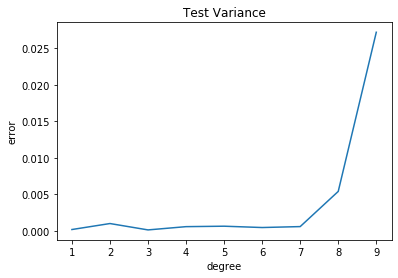

In [46]:
#looking at the variance
degrees = range(1, 10)
rmse_te,_ = bias_variance_demo_ridge()
rmse_te_variance = np.expand_dims(np.var(rmse_te, axis=0), axis=0)
plt.close()
plt.figure()
plt.plot(degrees, rmse_te_variance.T)
plt.xlabel("degree")
plt.ylabel("error")
plt.title("Test Variance");

By automatically computing the best lambda we see a decrease of variance

The maximum variance decreased a lot (10 times)
I tried manually with lambda:
- With small lambda the improvement are in highest degree
- With large lambda the error increases but train and test are more similar

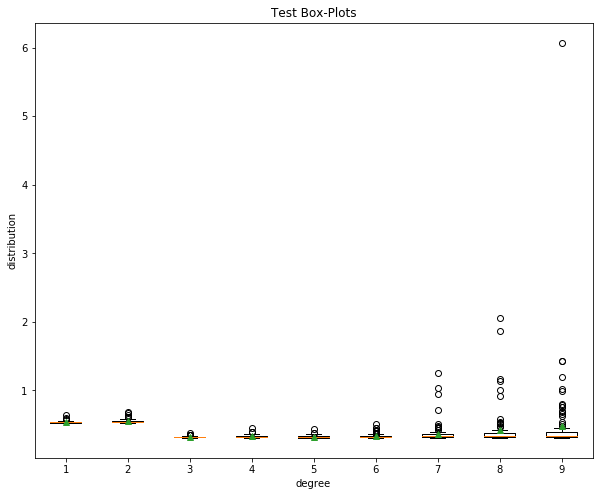

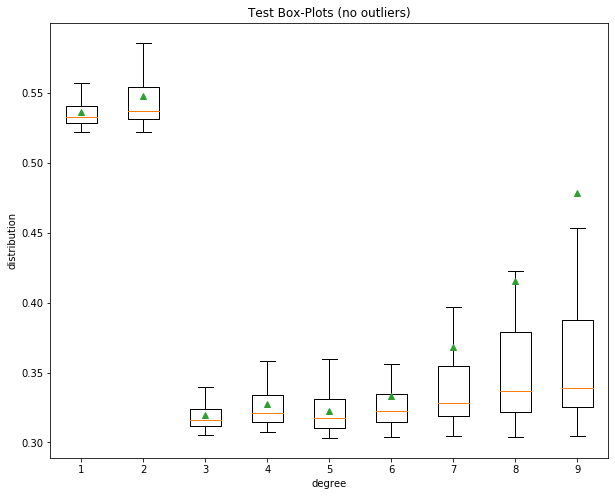

In [60]:
#visualize box plot for each degree (least square case)
rmse_te,_ = bias_variance_demo()
#print(rmse_te)
plt.close()
plt.figure(1, figsize=(10,8))
plt.boxplot(rmse_te, showmeans=True)
plt.xlabel("degree")
plt.ylabel("distribution")
plt.title("Test Box-Plots");
plt.figure(2, figsize=(10,8))
plt.boxplot(rmse_te, showfliers = False, showmeans=True)
plt.xlabel("degree")
plt.ylabel("distribution")
plt.title("Test Box-Plots (no outliers)");

From the boxplot we can clearly see that the variance increases a lot with increasing degrees, the median of the values is pushed down (many great test results, but some outliers push it up), mean increases due to outliers

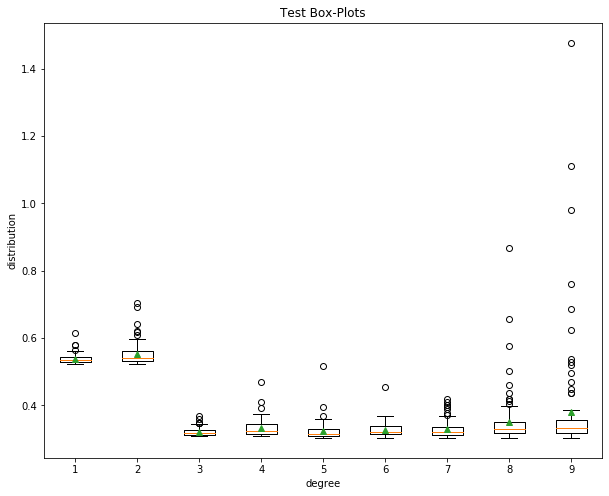

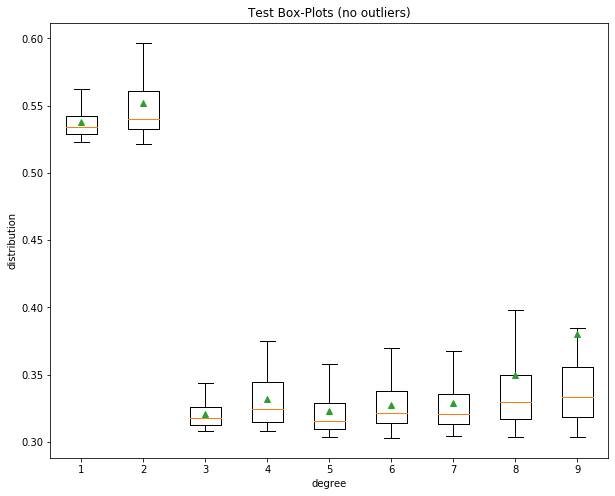

In [61]:
#visualize box plot for each degree (ridge case)
rmse_te,_ = bias_variance_demo_ridge()
plt.close()
plt.figure(1, figsize=(10,8))
plt.boxplot(rmse_te, showmeans=True)
plt.xlabel("degree")
plt.ylabel("distribution")
plt.title("Test Box-Plots");
plt.figure(2, figsize=(10,8))
plt.boxplot(rmse_te, showfliers = False, showmeans=True)
plt.xlabel("degree")
plt.ylabel("distribution")
plt.title("Test Box-Plots (no outliers)");

Less variance (clearly for highest degrees)